In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import glob
import cv2
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('/home/xc429/Junan/calib_test/cam_calib/*.png')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
#         cv.drawChessboardCorners(img, (9,6), corners2, ret)
#         plt.figure(figsize = (150,15))
#         plt.imshow(img)
#         cv.waitKey(500)
cv.destroyAllWindows()

ImportError: libpng12.so.0: cannot open shared object file: No such file or directory

In [36]:
# import pickle
# import cv2 as cv
# infile = open('./cam_calib/imgpoints.pkl','rb')
# imgpoints = pickle.load(infile)
# infile.close()

# infile = open('./cam_calib/objpoints.pkl','rb')
# objpoints = pickle.load(infile)
# infile.close()


# from random import sample
# objpoints = sample(objpoints,200)
# imgpoints = sample(imgpoints,200)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [37]:
import pickle 
from scipy.io import loadmat
pts_cam = loadmat('/home/xc429/Junan/calib_test/data_calib/pts_groups/pts_cam.mat')
pts_lidar = loadmat('/home/xc429/Junan/calib_test/data_calib/pts_groups/pts_lidar.mat')



pts_cam = pts_cam['CornerPoints_cam']
pts_lidar = pts_lidar['CornerPoints_lidar']

pts_cam = pts_cam.reshape(1,-1, 2)
pts_cam = np.float32(pts_cam)

pts_lidar = pts_lidar.reshape(1,-1,3)
pts_lidar = np.float32(pts_lidar)

In [38]:
cameraMatrix_guess = mtx
distCoeffs_guess = dist

In [4]:
ret, camera_matrix, distortion_coefficients, rvecs, tvecs = cv2.calibrateCamera(
        pts_lidar, pts_cam, (img.shape[1], img.shape[0]), mtx, dist, flags=(cv2.CALIB_USE_INTRINSIC_GUESS + 
                                                                            cv2.CALIB_FIX_K1 + 
                                                                            cv2.CALIB_FIX_K2 +  
                                                                            cv2.CALIB_FIX_K3 
                                                                            ))

R_new = cv2.Rodrigues(rvecs[0])[0]
T_new = tvecs[0]
print(R_new,T_new)

NameError: name 'cv2' is not defined

(1208, 1920, 3)

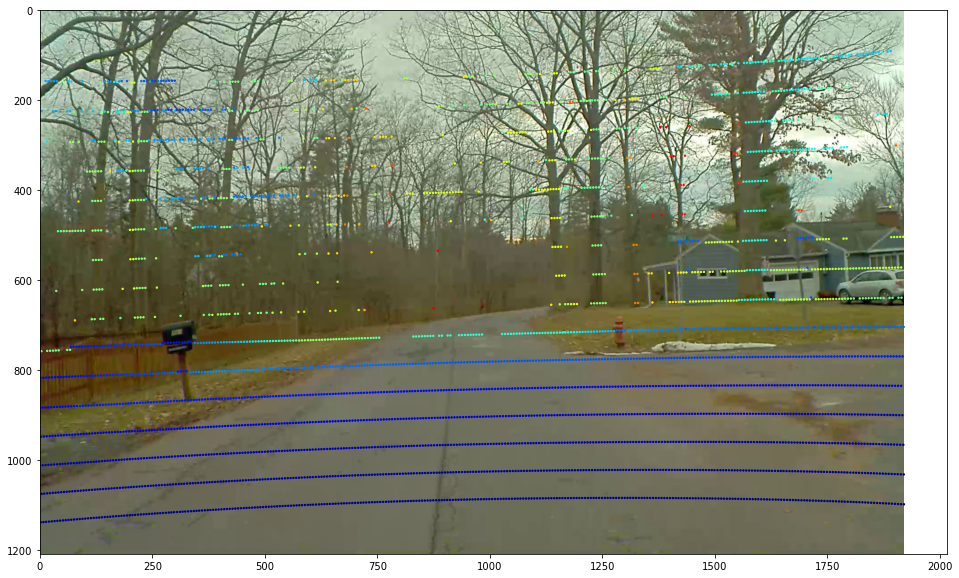

In [63]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('jet')

# lidar_file = '/home/xc429/Junan/calib_test/data2/cache/lidar_203/data/1607112277437436'
# img_file = '/home/xc429/Junan/calib_test/data2/cache/camera_front_left_60fov/1607112277504625.jpg'
img_file = '/home/xc429/Junan/calib_test/data2/cache/camera_front_left_60fov/1607112176637158.jpg'
lidar_file = '/home/xc429/Junan/calib_test/data2/cache/lidar_203/data/1607112176577423'
img_file = '/home/xc429/Junan/calib_test/data2/cache/camera_front_left_60fov/1607111874001474.jpg'
lidar_file = '/home/xc429/Junan/calib_test/data2/cache/lidar_203/data/1607111873997399'
img = plt.imread(img_file)


def load_pcl_from_bin5(bin_file_path):
    bin_pcd = np.fromfile(bin_file_path,dtype=np.float32)
    points = bin_pcd.reshape(-1,5)
    return points[:,:3],points[:,3],points[:,4]

pts, intensity, times = load_pcl_from_bin5(lidar_file)

pts_cam_coord = np.dot(R_new,pts.T) + T_new.reshape(-1,1) 
pts_cam_coord  = pts_cam_coord .T
pts = pts[pts_cam_coord [:,2]>=0,:] 
pts_cam_coord  = pts_cam_coord [pts_cam_coord [:,2]>=0,:] 
cmap = cm.get_cmap('jet')
pixels, _ = cv2.projectPoints(pts.reshape(1,-1,3), rvecs[0], tvecs[0], camera_matrix,  distortion_coefficients)
u = pixels[:,0,0]
v = pixels[:,0,1]
# pts within the img 
idx = (u>0)*(u<1920)*(v>0)*(v<1208)
u = u[idx]
v=v[idx]
plt.figure(figsize = (120,10))
plt.imshow(img)
plt.scatter(u,v,c=pts_cam_coord [idx,2], s = 2,cmap = cmap)
img.shape

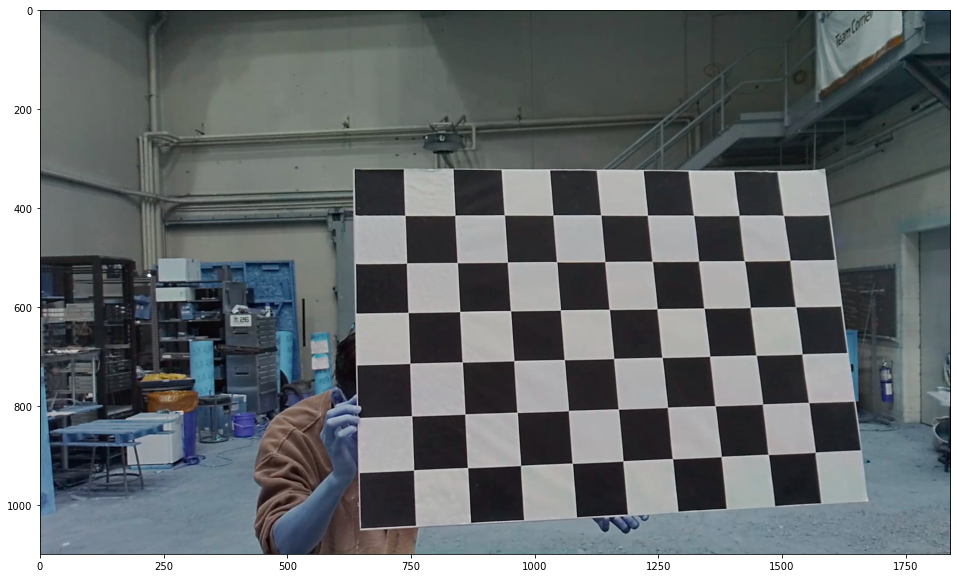

In [67]:
img = cv2.imread(images[5] )
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(camera_matrix,distortion_coefficients,(w,h),1,(w,h))
dst = cv2.undistort(img,camera_matrix,distortion_coefficients, None, newcameramtx)

plt.figure(figsize = (120,10))
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)


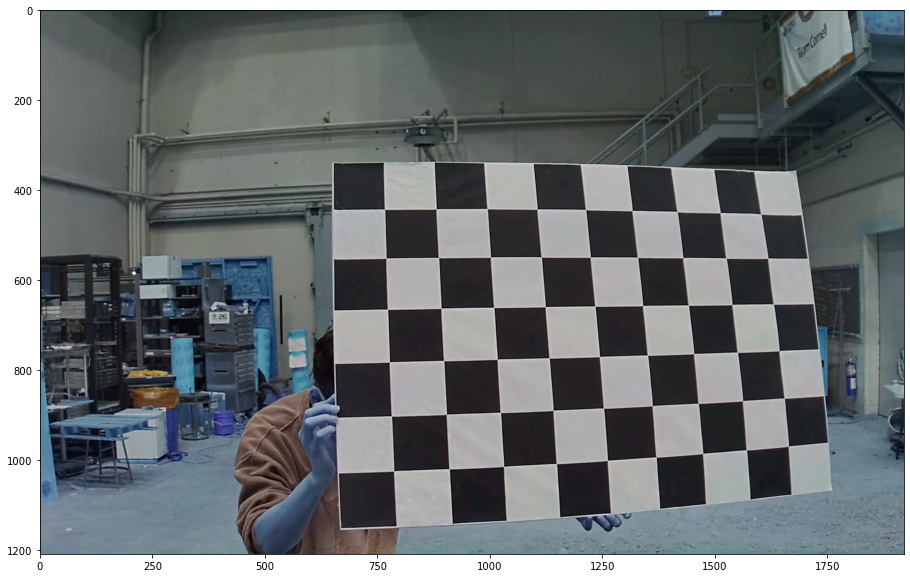

In [68]:
plt.figure(figsize = (120,10))
plt.imshow(img)

In [18]:
np.save('params/camera_matrix.npy',camera_matrix)
np.save('params/distortion_coefficients.npy',distortion_coefficients)
np.save('params/Rot.npy',R_new)
np.save('params/T.npy',T_new)

In [3]:
import numpy as np
camera_matrix=np.load('params/camera_matrix.npy')
distortion_coefficients=np.load('params/distortion_coefficients.npy')
R_new = np.load('params/Rot.npy')
T_new = np.load('params/T.npy')